In [1]:
# Importaing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_rows',100)

In [2]:
#Using pandas to read the csv file
fraud_data= pd.read_csv("fraudTrain.csv")
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#Examining the shape of the data (row by coulumn)
fraud_data.shape

(1296675, 23)

In [4]:
#Cheking the non null vlaue count and the data type of all features
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

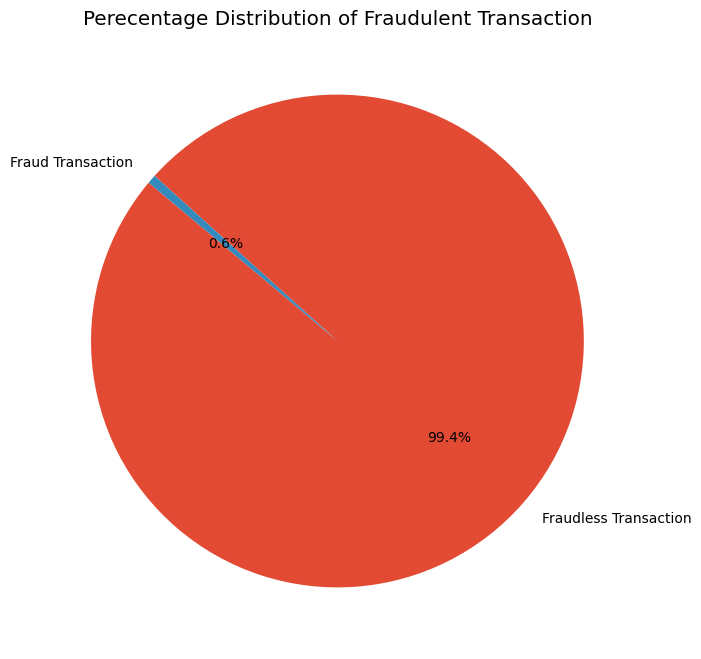

In [ ]:
#Checking the distribution of the target feature
plt.figure(figsize=(8, 8))
F_count = fraud_data['is_fraud'].value_counts()
fraud_labels = {0: 'Fraudless Transaction', 1: 'Fraud Transaction'}
labels_for_plot = [fraud_labels[gen] for gen in F_count.index]
plt.pie(F_count, labels=labels_for_plot, autopct='%1.1f%%', startangle=140)
plt.title('Perecentage Distribution of Fraudulent Transaction')
plt.show()

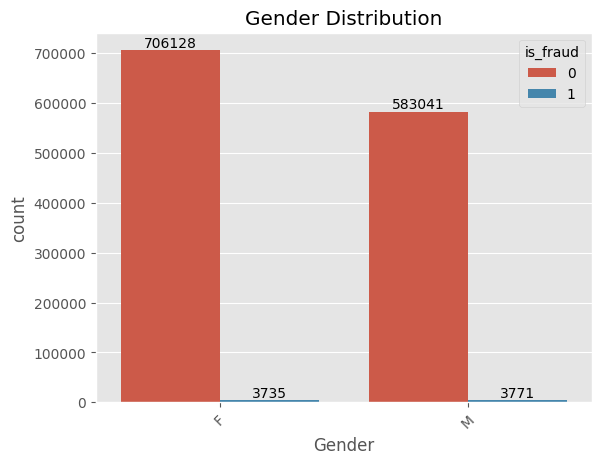

In [3]:
ax = sns.countplot(fraud_data, x='gender', hue='is_fraud')
plt.xticks(rotation = 45)
ax.set_title("Gender Distribution")
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel("Gender")
plt.show()

In [5]:
#Type casting data
fraud_data["trans_date_trans_time"] = pd.to_datetime(fraud_data["trans_date_trans_time"])
fraud_data["dob"] = pd.to_datetime(fraud_data["dob"])

In [6]:
#Checking for null values in the dataset
fraud_data.isnull().sum().sum()

0

There are no null values in our dataset

In [7]:
#Checing the data for duplicate rows
fraud_data.duplicated().sum()

0

In [8]:
fraud_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
#renaming the coulumns
fraud_data = fraud_data.rename(columns= {'Unnamed: 0' : 'Unique_Index', 'trans_date_trans_time':'Trans_date', 'category':'M_category',
       'amt':'Amount', 'first':'First_name', 'last':'Last_name', 'street':'Street_add'})

In [10]:
#one hot encoding for gender 
gender= pd.get_dummies(fraud_data['gender'],drop_first=True).astype(int)

In [11]:
# Dropping the gender column 
fraud_data.drop(['gender'],axis=1,inplace=True)

In [12]:
# Concating the encoded gender feature to the fraud dataset 
fraud_data = pd.concat([fraud_data,gender],axis=1)

In [13]:
#Renatimg the concated feature
fraud_data = fraud_data.rename(columns={"M":"Gender"})

In [14]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Unique_Index  1296675 non-null  int64         
 1   Trans_date    1296675 non-null  datetime64[ns]
 2   cc_num        1296675 non-null  int64         
 3   merchant      1296675 non-null  object        
 4   M_category    1296675 non-null  object        
 5   Amount        1296675 non-null  float64       
 6   First_name    1296675 non-null  object        
 7   Last_name     1296675 non-null  object        
 8   Street_add    1296675 non-null  object        
 9   city          1296675 non-null  object        
 10  state         1296675 non-null  object        
 11  zip           1296675 non-null  int64         
 12  lat           1296675 non-null  float64       
 13  long          1296675 non-null  float64       
 14  city_pop      1296675 non-null  int64         
 15

In [15]:
#Selecting only the coulumns with integer and float datatype for machine learning application
#Unique_Indexing was also not selected as this feature is only for indexing
fraud_data = fraud_data[[#'Unique_Index', 
    #'Trans_date', 
    'cc_num', #'merchant', 'M_category',
       'Amount', #'First_name', 'Last_name', 
       'Gender', #'Street_add', 'city',
       #'state', 
       'zip', 'lat', 'long', 'city_pop', #'job', 
       #'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud']].copy()

In [16]:
fraud_data.head()

,cc_num,Amount,Gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [17]:
corr_fraud = fraud_data.corr()
corr_fraud

,cc_num,Amount,Gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001769,0.001112,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
Amount,0.001769,1.000000,0.001034,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
Gender,0.001112,0.001034,1.000000,-0.065951,0.042935,0.050404,-0.028649,-0.000960,0.042645,0.050350,0.007642
zip,0.041459,0.001843,-0.065951,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,-0.059271,-0.001926,0.042935,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.048278,-0.000187,0.050404,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.008991,0.005818,-0.028649,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.000354,-0.000293,-0.000960,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.058942,-0.001873,0.042645,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.048252,-0.000151,0.050350,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721


Text(0.5, 1.0, 'Feature Correlation Heatmap')

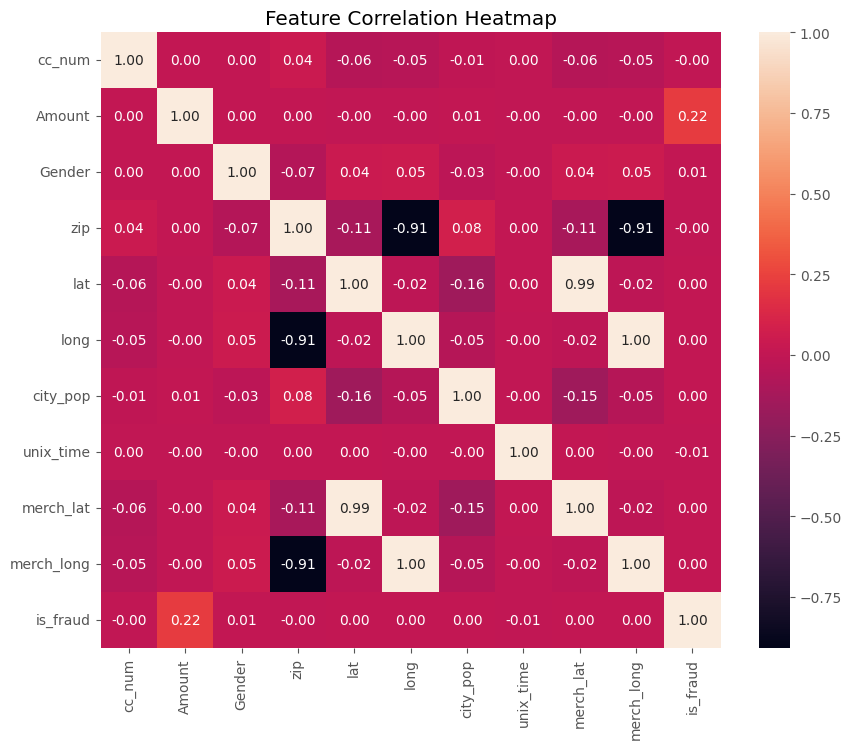

In [21]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_fraud, annot=True, fmt=".2f")
ax.set_title("Feature Correlation Heatmap")

In [18]:
#Dropping features to control for multicollinearity
fraud_data.drop(columns=['zip','merch_long','merch_lat'], axis=1, inplace=True)
fraud_data.head()

,cc_num,Amount,Gender,lat,long,city_pop,unix_time,is_fraud
0,2703186189652095,4.97,0,36.0788,-81.1781,3495,1325376018,0
1,630423337322,107.23,0,48.8878,-118.2105,149,1325376044,0
2,38859492057661,220.11,1,42.1808,-112.2620,4154,1325376051,0
3,3534093764340240,45.00,1,46.2306,-112.1138,1939,1325376076,0
4,375534208663984,41.96,1,38.4207,-79.4629,99,1325376186,0


In [19]:
#Splitting the dataset with regards to transaction status to check for presence of statistical anomalies
legit = fraud_data[fraud_data.is_fraud == 0]
fraud = fraud_data[fraud_data.is_fraud == 1]

In [20]:
#Statistical Measure of Data
pd.options.display.float_format = '{:.2f}'.format
legit.Amount.describe()

count   1289169.00
mean         67.67
std         154.01
min           1.00
25%           9.61
50%          47.28
75%          82.54
max       28948.90
Name: Amount, dtype: float64

In [21]:
fraud.Amount.describe()

count   7506.00
mean     531.32
std      390.56
min        1.06
25%      245.66
50%      396.50
75%      900.88
max     1376.04
Name: Amount, dtype: float64

The statistical data between fraud and legit transaction are significantly different

In [22]:
#Comparing mean for both legit and fraud transaction
fraud_data.groupby("is_fraud").mean()

,cc_num,Amount,Gender,lat,long,city_pop,unix_time
is_fraud,,,,,,,
0,417290057695872640.00,67.67,0.45,38.54,-90.23,88775.23,1349248612.02
1,400357683719600704.00,531.32,0.50,38.66,-89.92,97276.76,1348389120.97


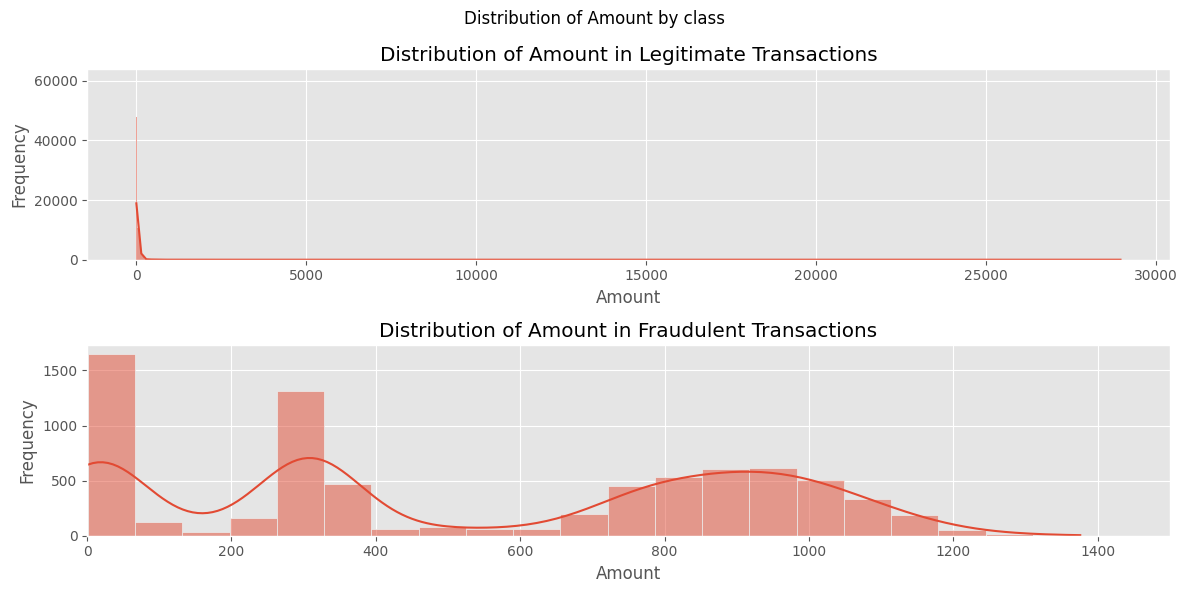

In [27]:
# Create figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
fig.suptitle('Distribution of Amount by class')

# Plot distribution of Amount in legitimate transactions
sns.histplot(legit.Amount, kde=True, ax=ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Amount in Legitimate Transactions')

# Plot distribution of Amount in fraudulent transactions
sns.histplot(fraud.Amount, kde=True, ax=ax2)
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Amount in Fraudulent Transactions')

# Adjust layout
plt.tight_layout()
plt.xlim((0,1500))
# Show the plots
plt.show()


## EDA Observation
- The major thing to notice is that our dataset has a major imbalance in the target feature with only 0.6% data representing fraud transactions while 99.4% represent fraudless transation.
- Multicollinearity was present in high levels with features such as 'zip','merch_long','merch_lat'
- Very little correlation was observed between our dependent feature and independent feature
- 'Amount' was the feature with the highest correlation of 0.22 to the target feature 
- We can notice the distribution of amount between legitimate fraud transaction are quite different
- The statistical mesures between legit and fraud transaction vary significantly
- The mean value of amount is significanty smaller for legit transaction compared with fraud transaction 
- The distribution shows that most legit transaction occure in smaller amounts with the statistical data confirming that around 75% percentile data falls below $82.54

In [23]:
#Min_max scaling amount feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
fraud_data['Amount_Scaled'] = scaler.fit_transform(fraud_data[["Amount"]])
fraud_data.head()

,cc_num,Amount,Gender,lat,long,city_pop,unix_time,is_fraud,Amount_Scaled
0,2703186189652095,4.97,0,36.08,-81.18,3495,1325376018,0,0.00
1,630423337322,107.23,0,48.89,-118.21,149,1325376044,0,0.00
2,38859492057661,220.11,1,42.18,-112.26,4154,1325376051,0,0.01
3,3534093764340240,45.00,1,46.23,-112.11,1939,1325376076,0,0.00
4,375534208663984,41.96,1,38.42,-79.46,99,1325376186,0,0.00


In [25]:
#dropping amount feature 
fraud_data.drop(columns='Amount', axis=1,inplace=True)

# Using ML model

In [26]:
fraud_data.columns

Index(['cc_num', 'Gender', 'lat', 'long', 'city_pop', 'unix_time', 'is_fraud',
       'Amount_Scaled'],
      dtype='object')

In [27]:
x = fraud_data[['cc_num', 'Gender', 'lat', 'long', 'city_pop', 'unix_time','Amount_Scaled']]
y = fraud_data['is_fraud']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Stratifying train test data split so that the fraud transaction is equally represented in both train and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, stratify=y ,random_state=101)

## Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()

In [36]:
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
#predicttion with decison tree model
prediction = dtmodel.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
#Testing the accuracy of the model 
from sklearn.metrics import confusion_matrix

In [39]:
cf_matrix = confusion_matrix(y_test,prediction)
print(cf_matrix)

[[385455   1296]
 [  1095   1157]]


<function matplotlib.pyplot.show(close=None, block=None)>

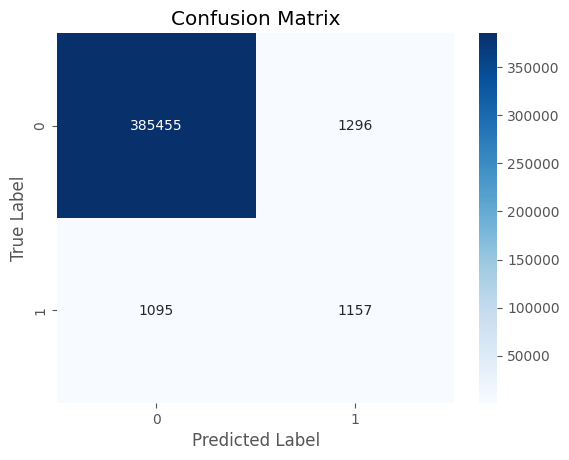

In [40]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.47      0.51      0.49      2252

    accuracy                           0.99    389003
   macro avg       0.73      0.76      0.74    389003
weighted avg       0.99      0.99      0.99    389003



In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9938535178391941

## Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier()

In [45]:
rfclass.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
prediction = rfclass.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
#testing accuracy of the model
from sklearn.metrics import confusion_matrix

In [48]:
cf_matrix = confusion_matrix(y_test,prediction)
cf_matrix

array([[386535,    216],
       [  1093,   1159]])

<function matplotlib.pyplot.show(close=None, block=None)>

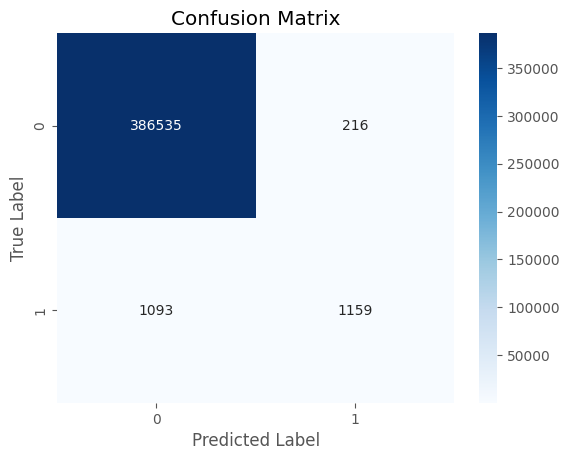

In [49]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.84      0.51      0.64      2252

    accuracy                           1.00    389003
   macro avg       0.92      0.76      0.82    389003
weighted avg       1.00      1.00      1.00    389003



In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9966349873908428

## xgboost model

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost = GradientBoostingClassifier()

In [53]:
xgboost.fit(x_train,y_train)

In [ ]:
prediction = xgboost.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Accuracy of the model
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(y_test,prediction)
cf_matrix

array([[386442,    322],
       [  1647,    592]])

<function matplotlib.pyplot.show(close=None, block=None)>

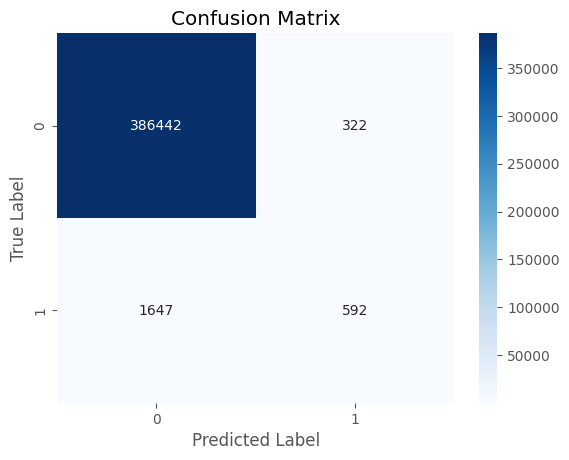

In [ ]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386764
           1       0.65      0.26      0.38      2239

    accuracy                           0.99    389003
   macro avg       0.82      0.63      0.69    389003
weighted avg       0.99      0.99      0.99    389003



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9949383423778223

## CatBoost

In [ ]:
from catboost import CatBoostClassifier
c_boost = CatBoostClassifier()

In [ ]:
c_boost.fit(x_train,y_train)

Learning rate set to 0.188786
0:	learn: 0.2960432	total: 190ms	remaining: 3m 9s
1:	learn: 0.1397037	total: 397ms	remaining: 3m 18s
2:	learn: 0.0695697	total: 595ms	remaining: 3m 17s
3:	learn: 0.0437824	total: 813ms	remaining: 3m 22s
4:	learn: 0.0322584	total: 990ms	remaining: 3m 17s
5:	learn: 0.0276356	total: 1.19s	remaining: 3m 16s
6:	learn: 0.0244301	total: 1.36s	remaining: 3m 13s
7:	learn: 0.0227402	total: 1.54s	remaining: 3m 11s
8:	learn: 0.0217785	total: 1.71s	remaining: 3m 8s
9:	learn: 0.0212133	total: 1.9s	remaining: 3m 7s
10:	learn: 0.0208507	total: 2.09s	remaining: 3m 8s
11:	learn: 0.0205901	total: 2.28s	remaining: 3m 7s
12:	learn: 0.0204402	total: 2.48s	remaining: 3m 7s
13:	learn: 0.0200944	total: 2.67s	remaining: 3m 8s
14:	learn: 0.0200014	total: 2.86s	remaining: 3m 7s
15:	learn: 0.0199100	total: 3.06s	remaining: 3m 8s
16:	learn: 0.0196616	total: 3.23s	remaining: 3m 7s
17:	learn: 0.0194064	total: 3.44s	remaining: 3m 7s
18:	learn: 0.0193750	total: 3.63s	remaining: 3m 7s
19:	l

In [ ]:
prediction = c_boost.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Accuracy of the model
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(y_test,prediction)
cf_matrix

array([[386623,    141],
       [   995,   1244]])

<function matplotlib.pyplot.show(close=None, block=None)>

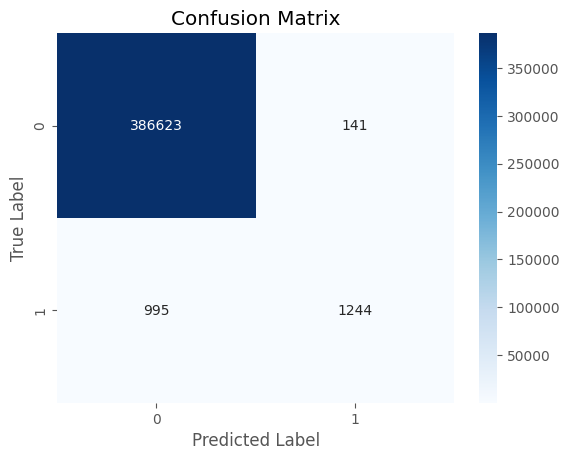

In [ ]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386764
           1       0.90      0.56      0.69      2239

    accuracy                           1.00    389003
   macro avg       0.95      0.78      0.84    389003
weighted avg       1.00      1.00      1.00    389003



## K Neighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
kn_class = KNeighborsClassifier()

In [31]:
kn_class.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
prediction = kn_class.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#Accuracy of the model
from sklearn.metrics import confusion_matrix

In [34]:
cf_matrix = confusion_matrix(y_test,prediction)
cf_matrix

array([[386190,    561],
       [   249,   2003]])

<function matplotlib.pyplot.show(close=None, block=None)>

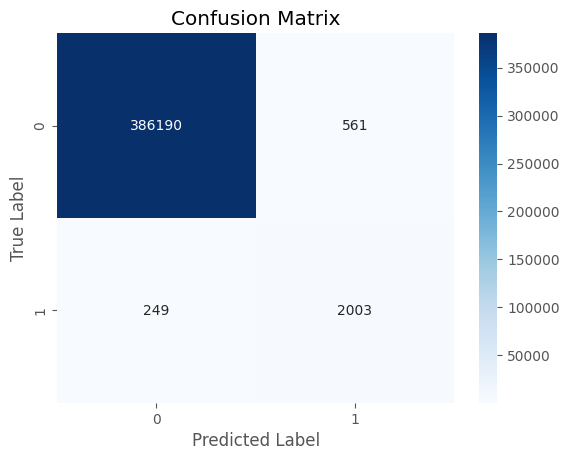

In [35]:
ax = sns.heatmap(cf_matrix,annot= cf_matrix, fmt='d',cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.78      0.89      0.83      2252

    accuracy                           1.00    389003
   macro avg       0.89      0.94      0.92    389003
weighted avg       1.00      1.00      1.00    389003



## Model Performance
- When we observe the classification report K Neighbors Classifier boasts the best performance across all the models with an f1-score of 0.83